In [1]:
%load_ext autoreload
%autoreload 2

# Report notebook

In [2]:
import pandas as pd

df = pd.read_csv('datasets/tmdb-15000-movies.csv', lineterminator='\n')

In [8]:
from tmdb15k.datapoints import (
    Genres, Keywords, OriginalLanguage, Popularity, ReleaseDate, VoteAverage, 
    VoteCount
)

# df = df[df['popularity'] <= 100] # Remove outliers.
# df = df[df['popularity'] <= 50] # Remove outliers.
# df = df[df['vote_count'] >= 100] # These may be too opinionated.
# df = df[df['vote_count'] <= 2000]

# release_date = ReleaseDate(df)
# df = df[release_date.series_year >= 1980] # Remove old movies.

release_date = ReleaseDate(df)
popularity = Popularity(df)
vote_average = VoteAverage(df)
vote_count = VoteCount(df)
genres = Genres(df)
keywords = Keywords(df)
original_language = OriginalLanguage(df)

/home/cezar/code/cezarmathe/bigdata-tmdb-1500/tmdb15k/datapoints.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.fillna(0, inplace=True)
/home/cezar/code/cezarmathe/bigdata-tmdb-1500/tmdb15k/ops.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dst] = (df[src] - df[src].min()) / (df[src].max() - df[src].min())
/home/cezar/code/cezarmathe/bigdata-tmdb-1500/tmdb15k/ops.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [4]:
def describe_column(df: pd.DataFrame | pd.Series, name: str):
    print(f'{name}:')
    print(df.describe())
    print()


describe_column(vote_average.df, 'vote_average')
describe_column(vote_count.df, 'vote_count')
describe_column(popularity.df, 'popularity')
describe_column(release_date.df, 'release_date')

vote_average:
       vote_average  vote_average_min_max  vote_average_z_score
count  15871.000000          15871.000000          1.587100e+04
mean       5.603201              0.560320          2.292218e-16
std        2.555917              0.255592          1.000000e+00
min        0.000000              0.000000         -2.192247e+00
25%        5.700000              0.570000          3.787260e-02
50%        6.400000              0.640000          3.117470e-01
75%        7.100000              0.710000          5.856213e-01
max       10.000000              1.000000          1.720244e+00

vote_count:
         vote_count  vote_count_log10  vote_count_log10_min_max  \
count  15871.000000      15871.000000              15871.000000   
mean    1035.291475          2.017726                  0.445907   
std     2366.743281          1.262976                  0.279111   
min        0.000000          0.000000                  0.000000   
25%        3.000000          0.602060                  0.13305

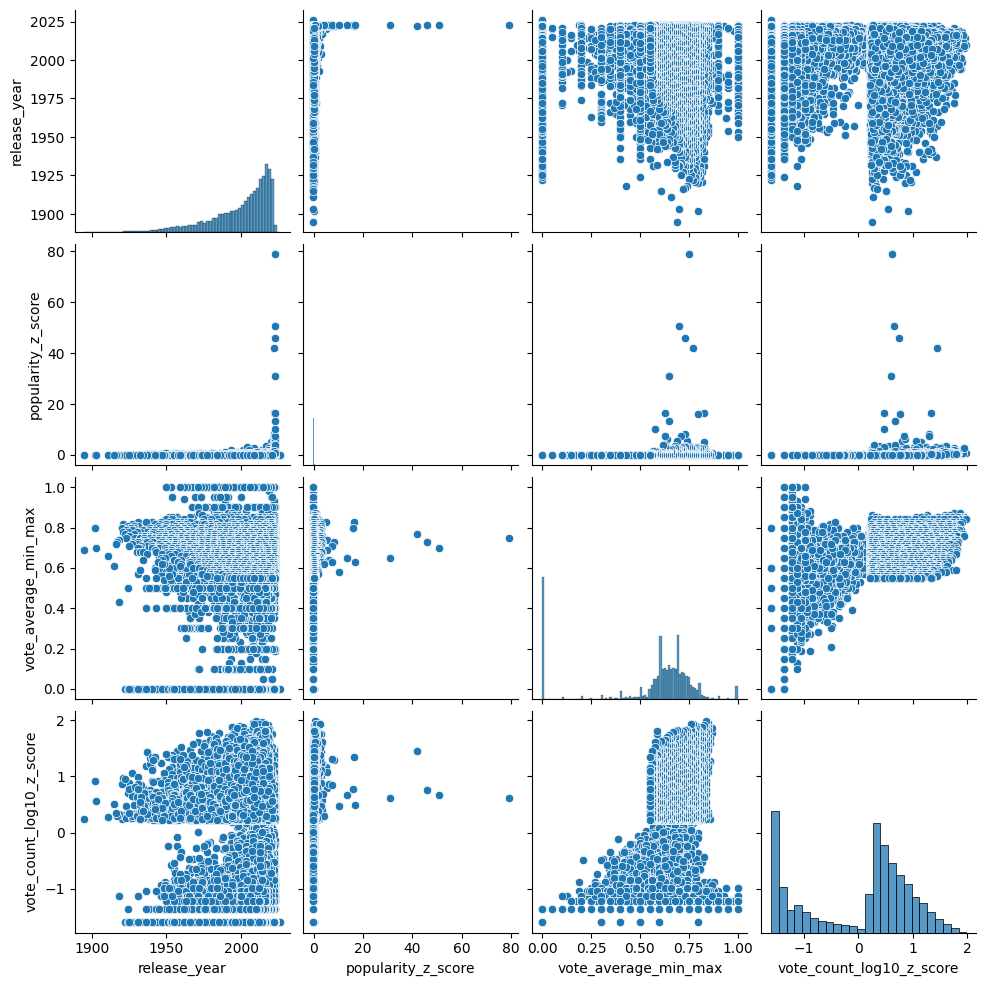

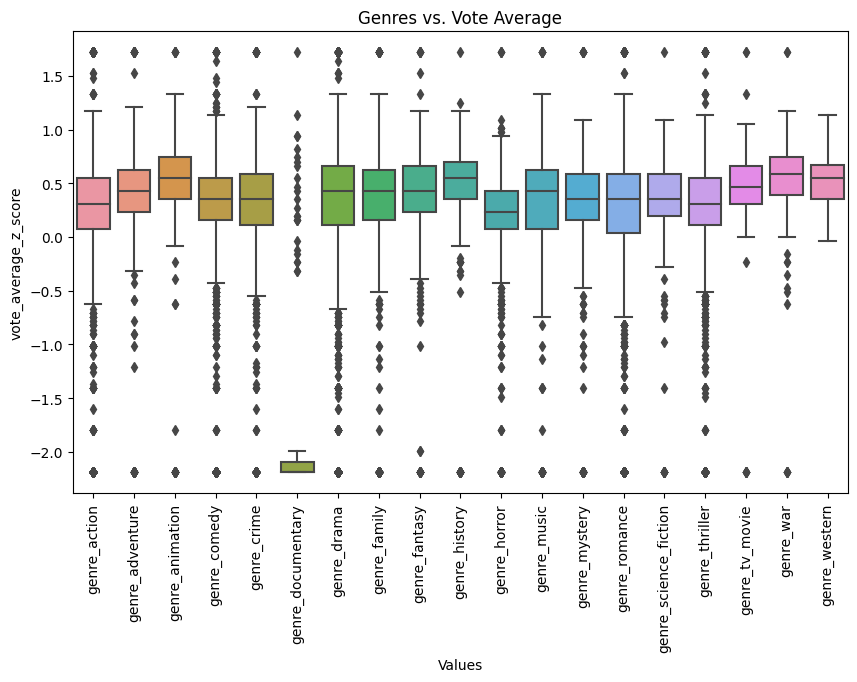

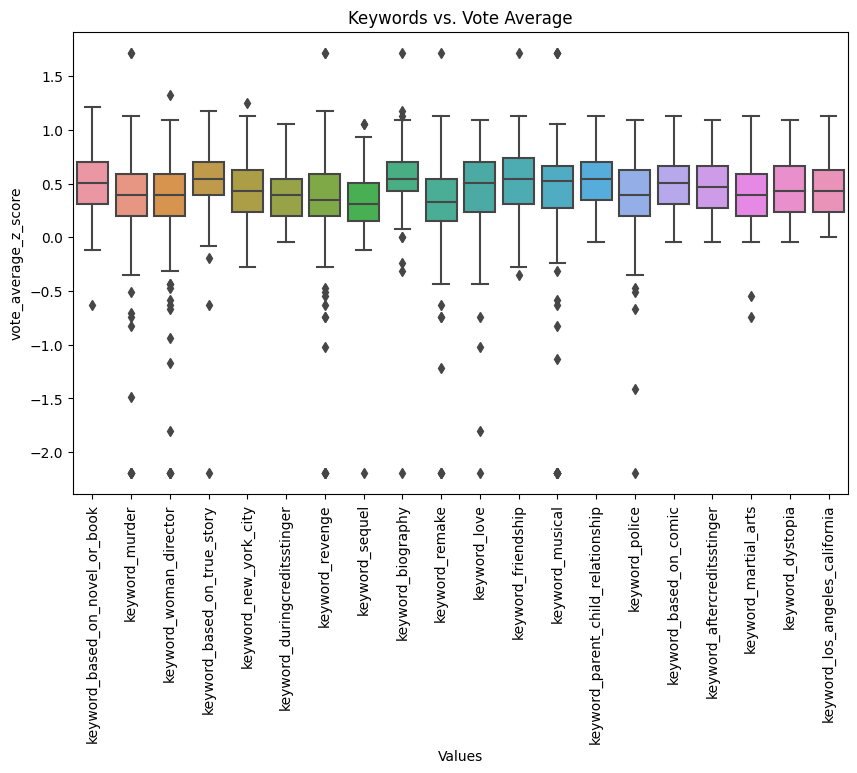

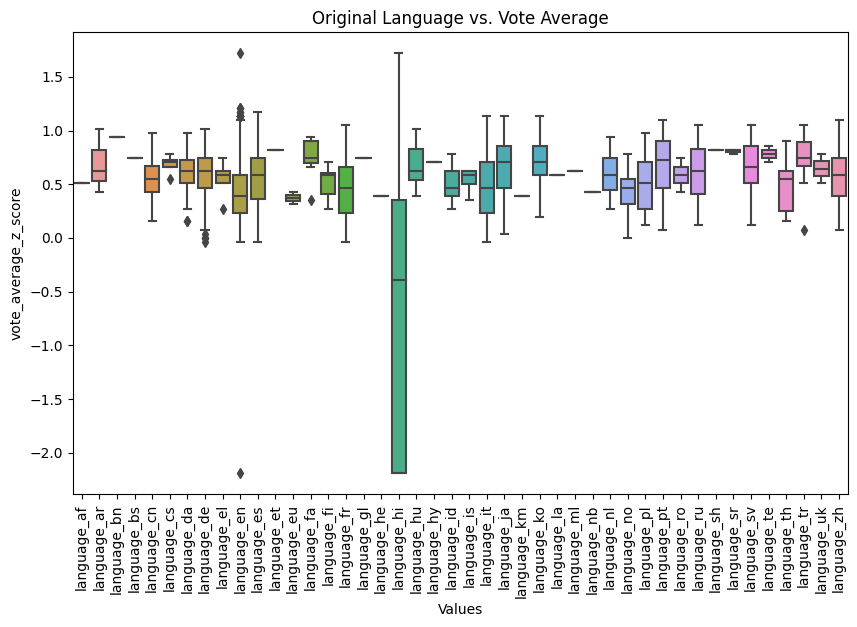

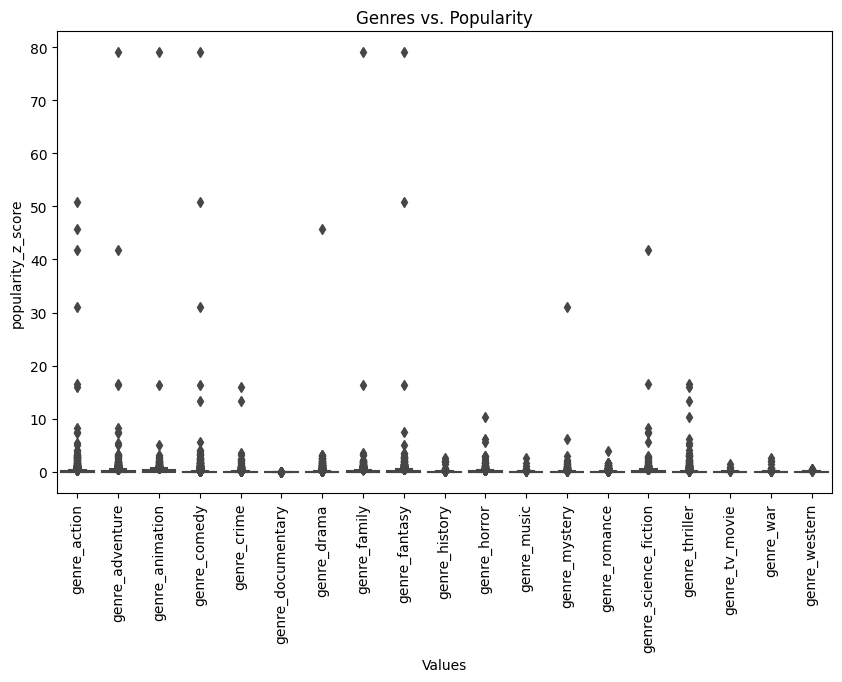

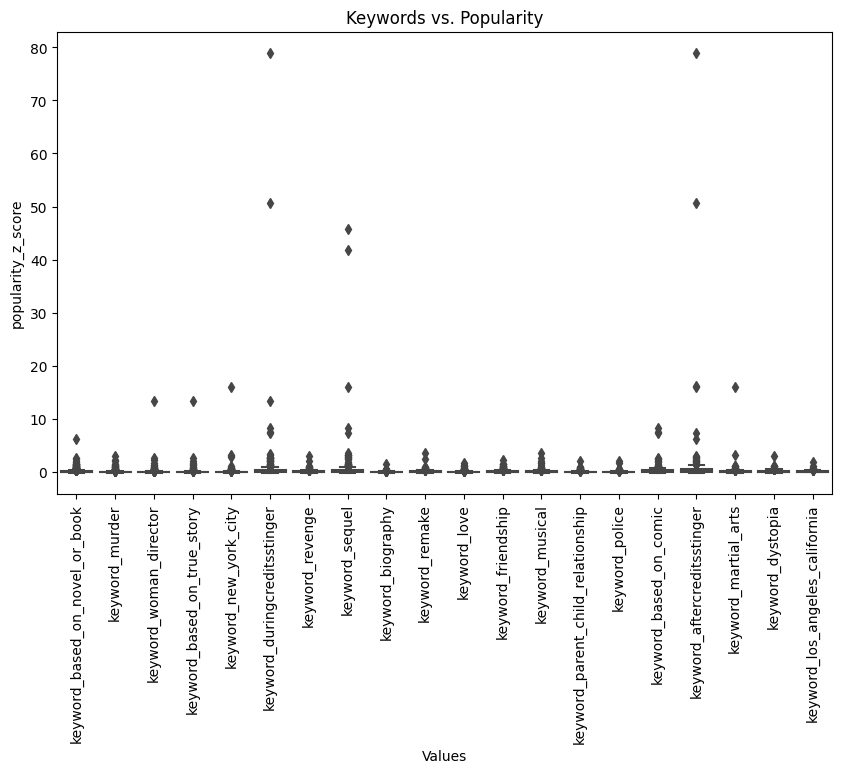

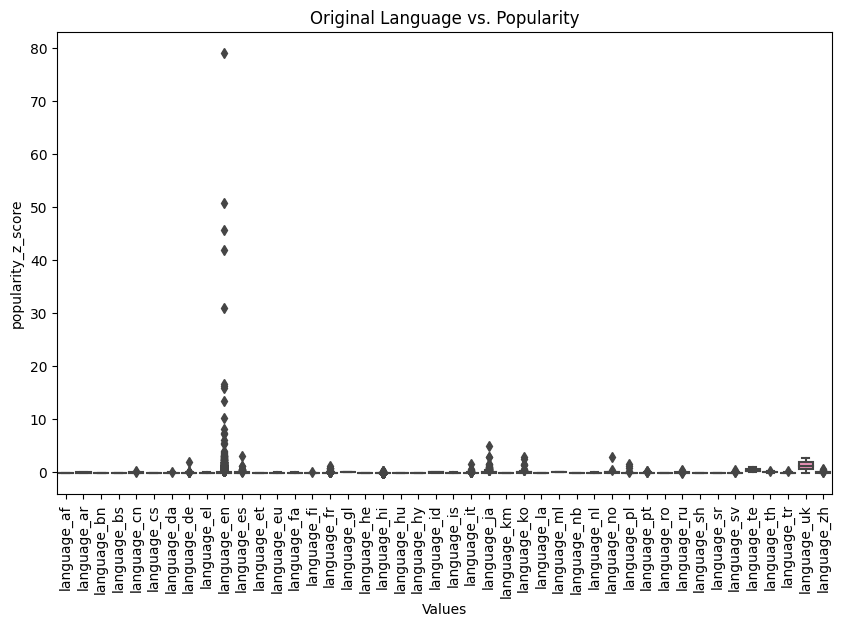

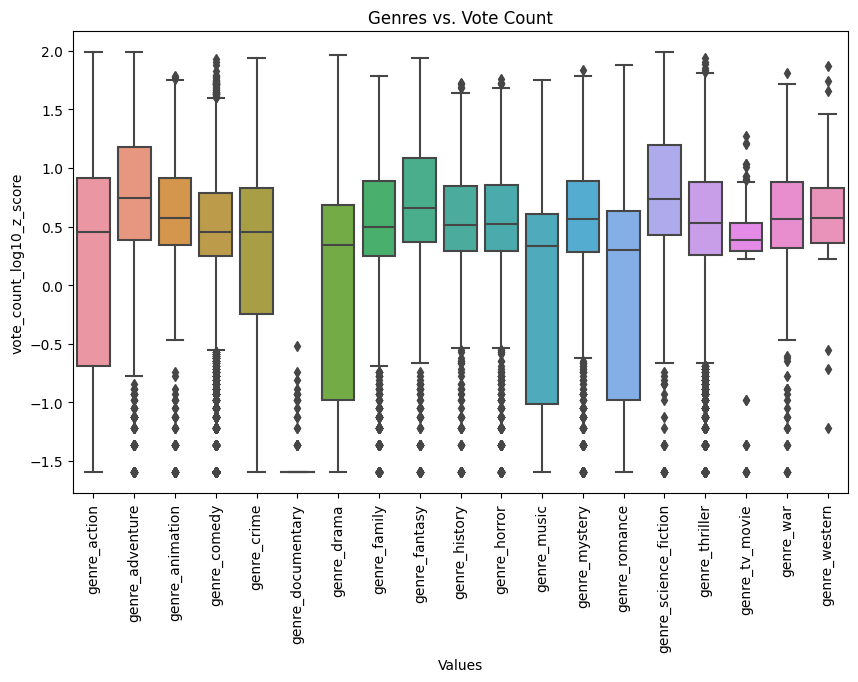

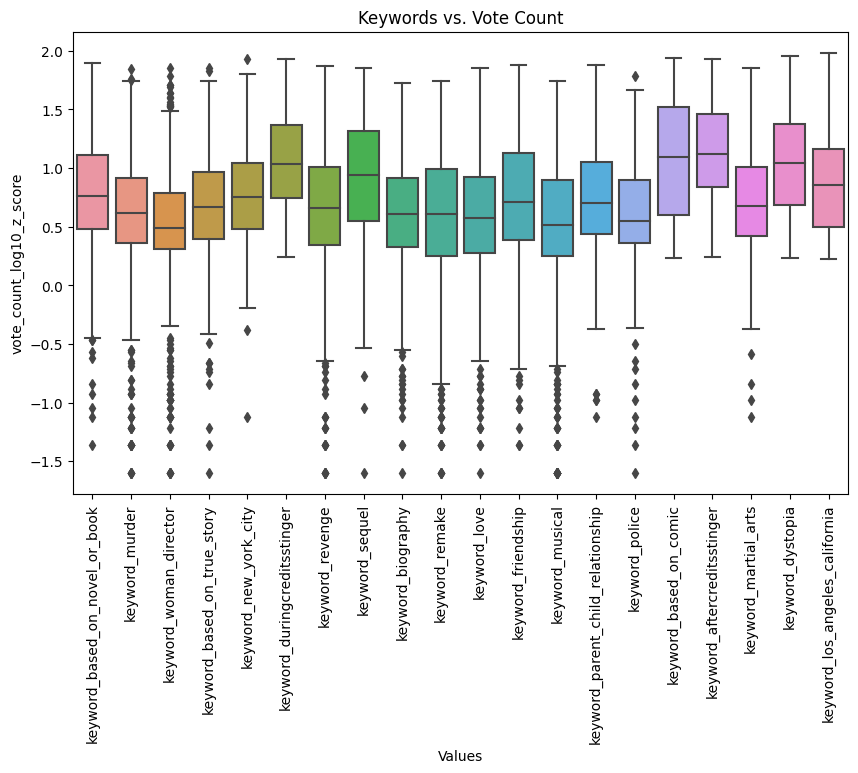

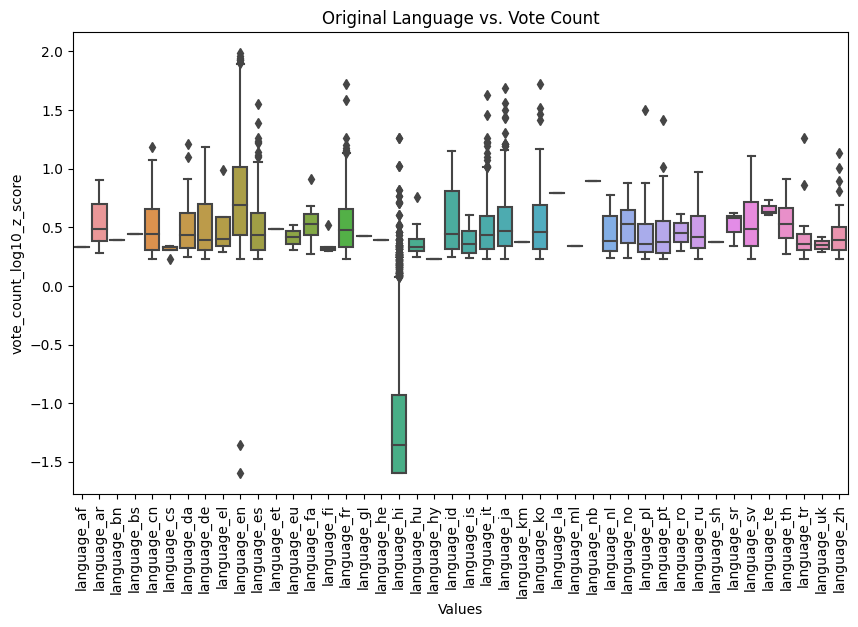

In [5]:
import seaborn as sns

import tmdb15k.plots as plots

# Plot various relationships to see if there are any obvious correlations.
df_pairplot = pd.concat([
    release_date.series_year,
    # popularity.df_min_max,
    popularity.df_z_score,
    vote_average.df_min_max,
    # vote_average.df_z_score,
    # vote_count.df_log10_min_max,
    vote_count.df_log10_z_score,
], axis=1)
sns.pairplot(df_pairplot)

plots.box(vote_average.df_z_score, genres.df, 'Genres vs. Vote Average')
plots.box(vote_average.df_z_score, keywords.df[keywords.columns_top_20], 'Keywords vs. Vote Average')
plots.box(vote_average.df_z_score, original_language.df, 'Original Language vs. Vote Average')
plots.box(popularity.df_z_score, genres.df, 'Genres vs. Popularity')
plots.box(popularity.df_z_score, keywords.df[keywords.columns_top_20], 'Keywords vs. Popularity')
plots.box(popularity.df_z_score, original_language.df, 'Original Language vs. Popularity')
plots.box(vote_count.df_log10_z_score.sort_values(), genres.df, 'Genres vs. Vote Count')
plots.box(vote_count.df_log10_z_score, keywords.df[keywords.columns_top_20], 'Keywords vs. Vote Count')
plots.box(vote_count.df_log10_z_score, original_language.df, 'Original Language vs. Vote Count')

===> Summary | Vote average -> Popularity
                          Model      RMSE
3  Gradient Boosting Regression  1.120490
2      Random Forest Regression  1.120666
4                XGB Regression  1.120714
1      Decision Tree Regression  1.120718
0             Linear Regression  1.120793


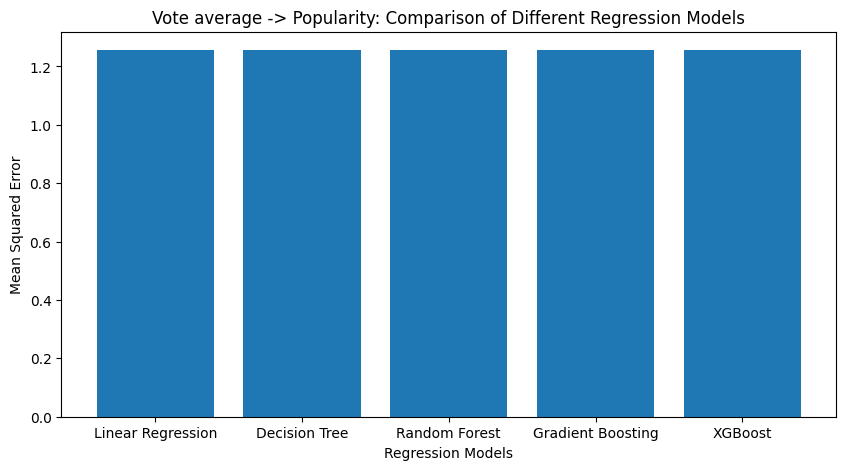

===> Summary | Vote count + Vote average -> Popularity
                          Model      RMSE
0             Linear Regression  1.115485
3  Gradient Boosting Regression  1.140315
2      Random Forest Regression  1.151524
4                XGB Regression  1.170730
1      Decision Tree Regression  1.172940


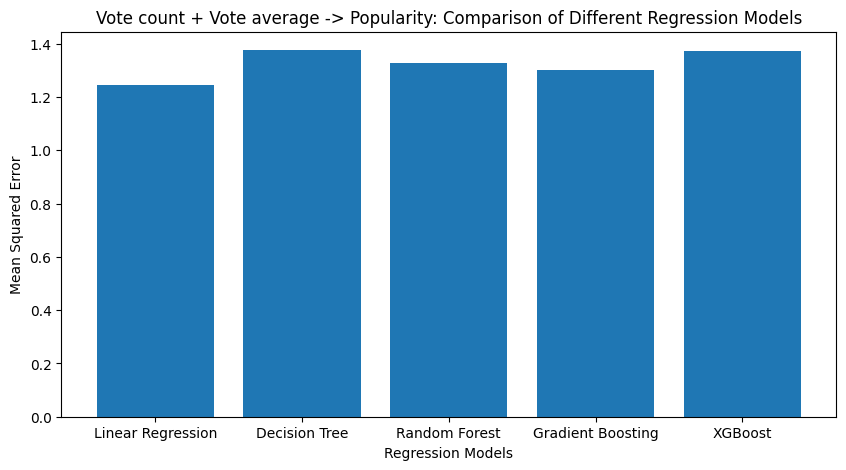

===> Summary | Genres + Keywords (top 20) + Vote average + Vote count -> Popularity
                          Model      RMSE
0             Linear Regression  1.115250
3  Gradient Boosting Regression  1.158513
1      Decision Tree Regression  1.169271
2      Random Forest Regression  1.171162
4                XGB Regression  1.275667


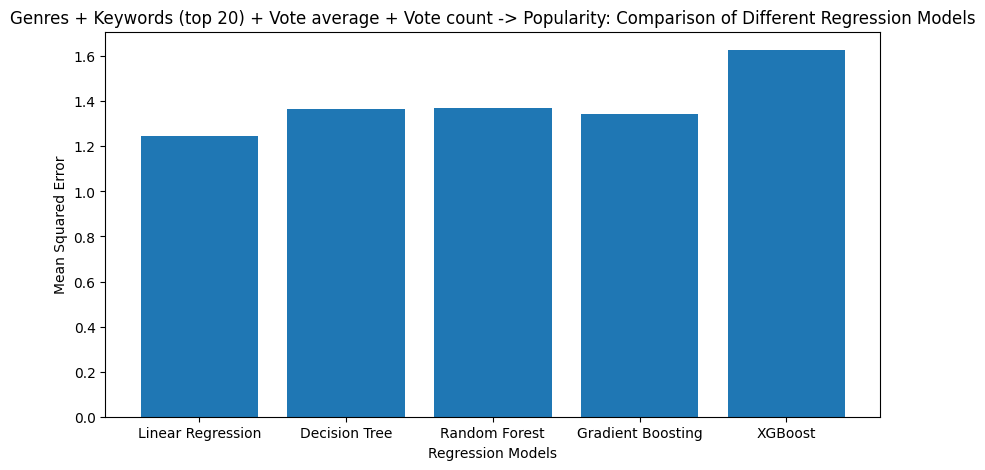

===> Summary | Genres + Keywords (top 20) + Popularity + Vote count -> Vote average
                          Model      RMSE
3  Gradient Boosting Regression  0.098926
4                XGB Regression  0.104490
2      Random Forest Regression  0.106875
1      Decision Tree Regression  0.133896
0             Linear Regression  0.177730


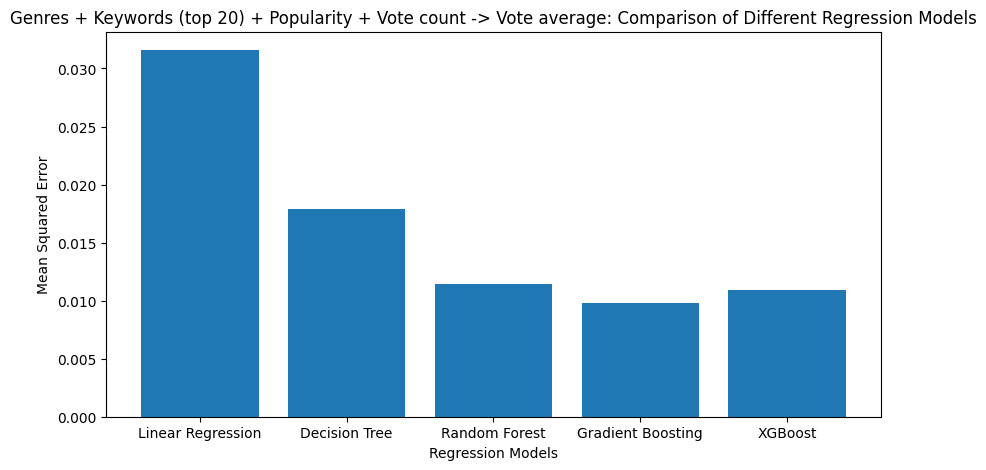

===> Summary | Genres + Keywords (top 20) + Popularity -> Vote average
                          Model      RMSE
3  Gradient Boosting Regression  0.173075
4                XGB Regression  0.173878
2      Random Forest Regression  0.178651
1      Decision Tree Regression  0.216257
0             Linear Regression  0.223277


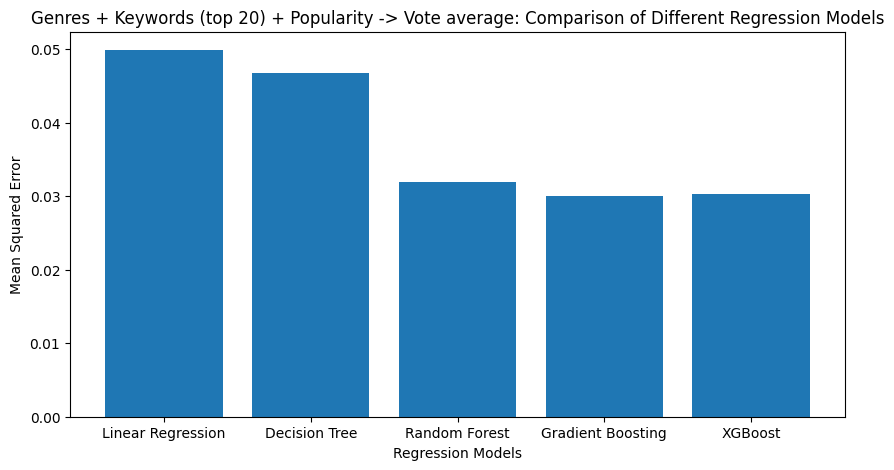

===> Summary | Genres + Keywords (top 20) + Vote count -> Vote average
                          Model      RMSE
3  Gradient Boosting Regression  0.098853
4                XGB Regression  0.100275
2      Random Forest Regression  0.106891
1      Decision Tree Regression  0.120213
0             Linear Regression  0.177729


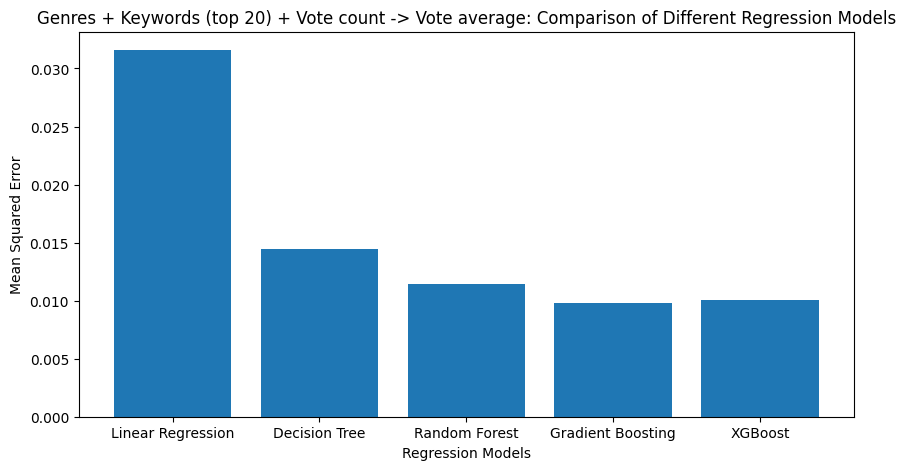

===> Summary | Genres + Keywords (top 20) -> Vote average
                          Model      RMSE
4                XGB Regression  0.212372
2      Random Forest Regression  0.213308
1      Decision Tree Regression  0.216658
3  Gradient Boosting Regression  0.220337
0             Linear Regression  0.223633


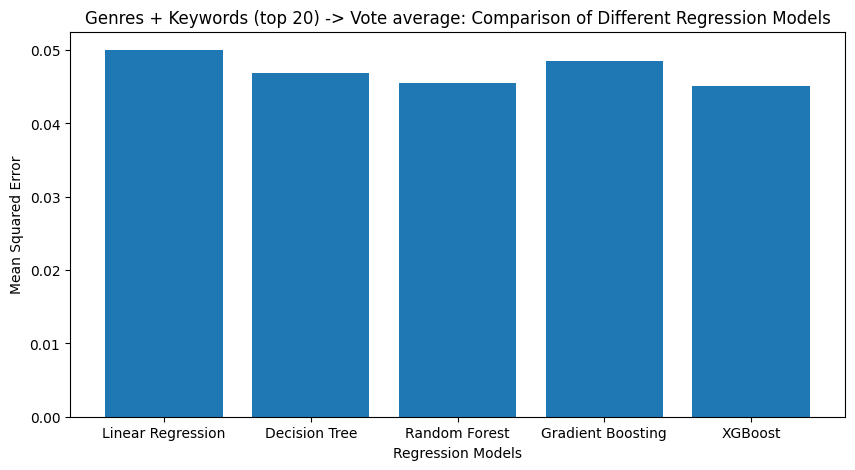

===> Summary | Genres + Keywords (top 20) -> Popularity
                          Model      RMSE
0             Linear Regression  1.119357
2      Random Forest Regression  1.123059
3  Gradient Boosting Regression  1.143800
4                XGB Regression  1.155326
1      Decision Tree Regression  1.444930


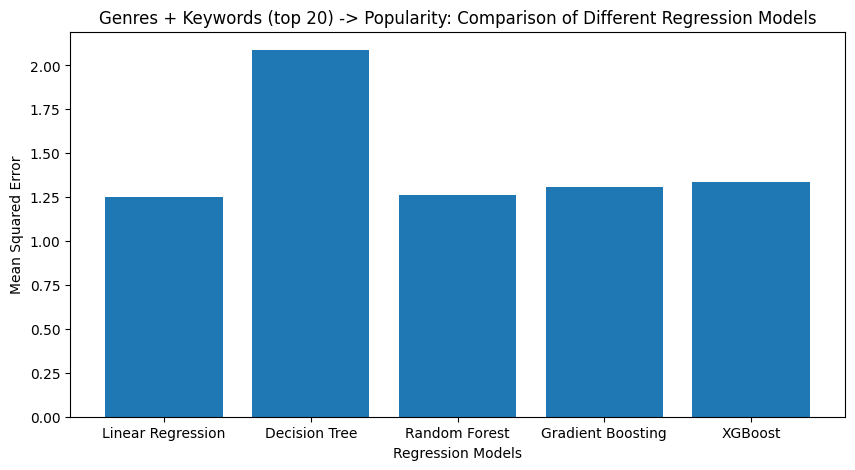

In [6]:
from tmdb15k.workflows import Relationship 

relationships: list[Relationship] = [
    Relationship('Vote average -> Popularity', [vote_average.df_min_max], popularity.df_z_score),
    Relationship('Vote count + Vote average -> Popularity', [vote_count.df_log10_z_score, vote_average.df_min_max], popularity.df_z_score),
    Relationship('Genres + Keywords (top 20) + Vote average + Vote count -> Popularity', [genres.df, keywords.df[keywords.columns_top_20], vote_average.df_min_max, vote_count.df_log10_z_score], popularity.df_z_score),
    Relationship('Genres + Keywords (top 20) + Popularity + Vote count -> Vote average', [genres.df, keywords.df[keywords.columns_top_20], popularity.df_z_score, vote_count.df_log10_z_score], vote_average.df_min_max),
    Relationship('Genres + Keywords (top 20) + Popularity -> Vote average', [genres.df, keywords.df[keywords.columns_top_20], popularity.df_z_score], vote_average.df_min_max),
    Relationship('Genres + Keywords (top 20) + Vote count -> Vote average', [genres.df, keywords.df[keywords.columns_top_20], vote_count.df_log10_z_score], vote_average.df_min_max),
    Relationship('Genres + Keywords (top 20) -> Vote average', [genres.df, keywords.df[keywords.columns_top_20]], vote_average.df_min_max),
    Relationship('Genres + Keywords (top 20) -> Popularity', [genres.df, keywords.df[keywords.columns_top_20]], popularity.df_z_score),
]

for i in relationships:
    i.print_summary()
    i.print_plot()

===> Summary | Vote average -> Popularity
                          Model      RMSE
3  Gradient Boosting Regression  1.120490
2      Random Forest Regression  1.120666
4                XGB Regression  1.120714
1      Decision Tree Regression  1.120718
0             Linear Regression  1.120793


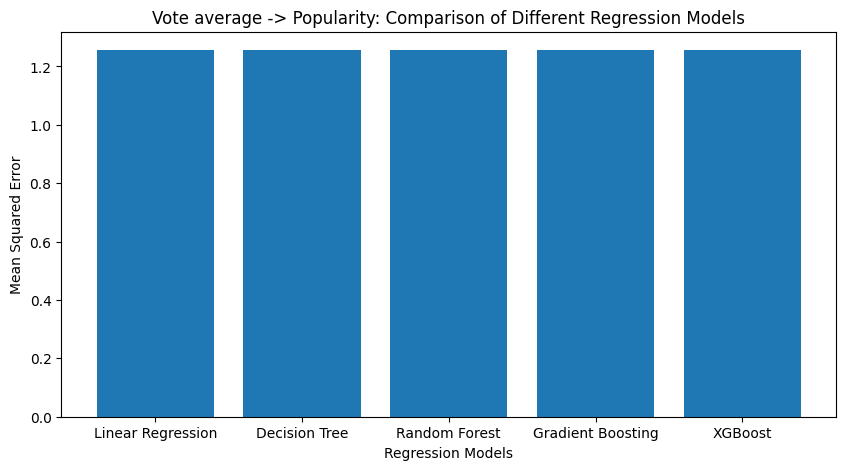

===> Summary | Vote count + Vote average -> Popularity
                          Model      RMSE
0             Linear Regression  1.115485
3  Gradient Boosting Regression  1.140315
2      Random Forest Regression  1.151524
4                XGB Regression  1.170730
1      Decision Tree Regression  1.172940


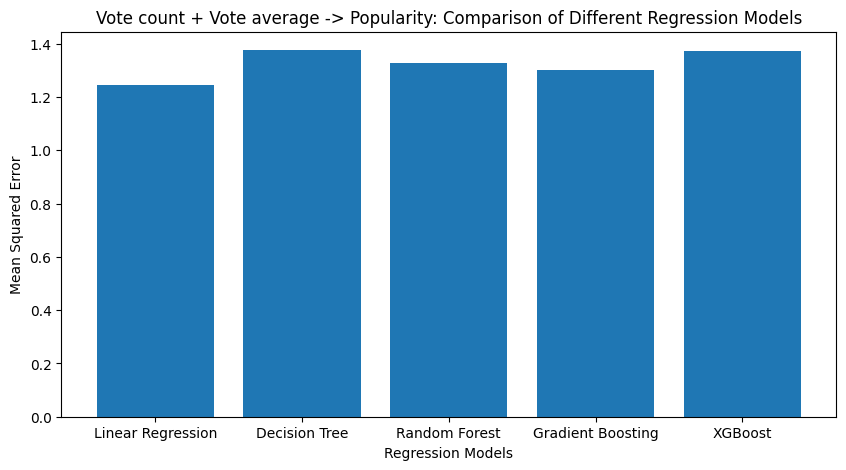

===> Summary | Genres + Keywords (top 50) + Vote average + Vote count -> Popularity
                          Model      RMSE
0             Linear Regression  1.117611
1      Decision Tree Regression  1.126388
2      Random Forest Regression  1.143778
3  Gradient Boosting Regression  1.162481
4                XGB Regression  1.257698


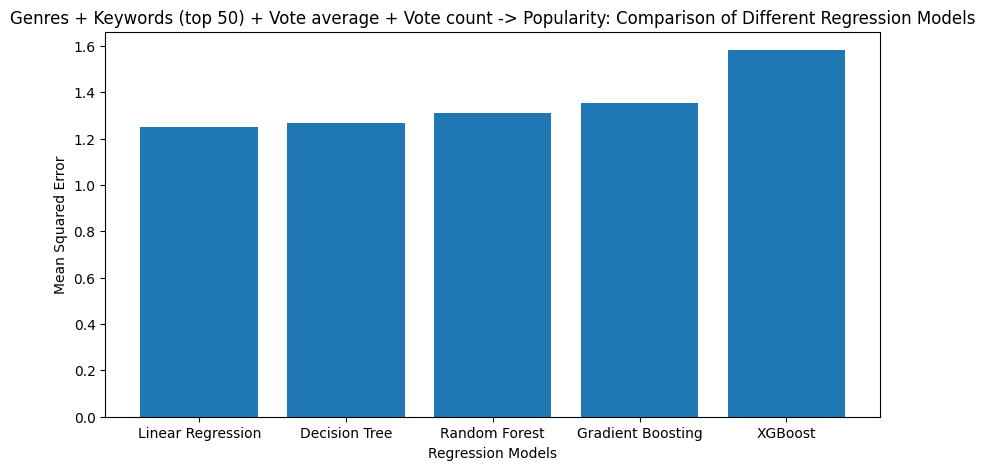

===> Summary | Genres + Keywords (top 50) + Popularity + Vote count -> Vote average
                          Model      RMSE
3  Gradient Boosting Regression  0.098734
4                XGB Regression  0.104225
2      Random Forest Regression  0.106493
1      Decision Tree Regression  0.133375
0             Linear Regression  0.177526


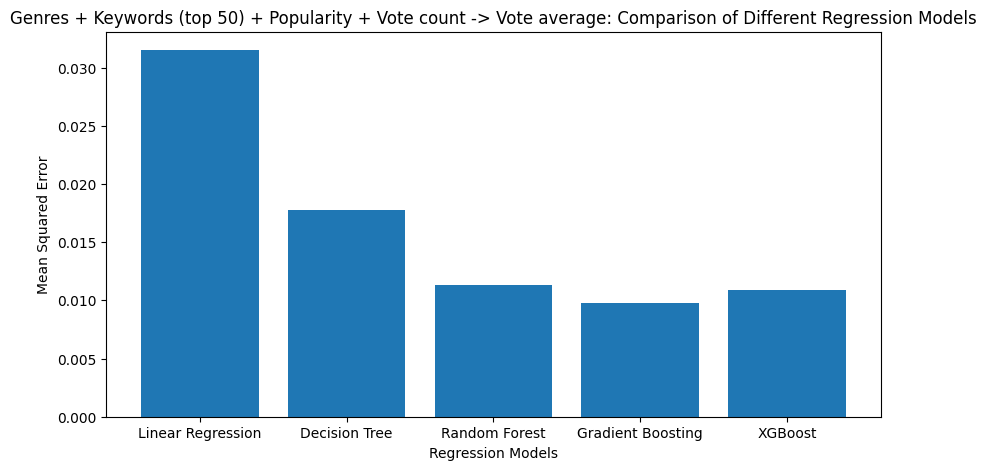

===> Summary | Genres + Keywords (top 50) + Popularity -> Vote average
                          Model      RMSE
3  Gradient Boosting Regression  0.173240
4                XGB Regression  0.174640
2      Random Forest Regression  0.177961
1      Decision Tree Regression  0.216352
0             Linear Regression  0.221359


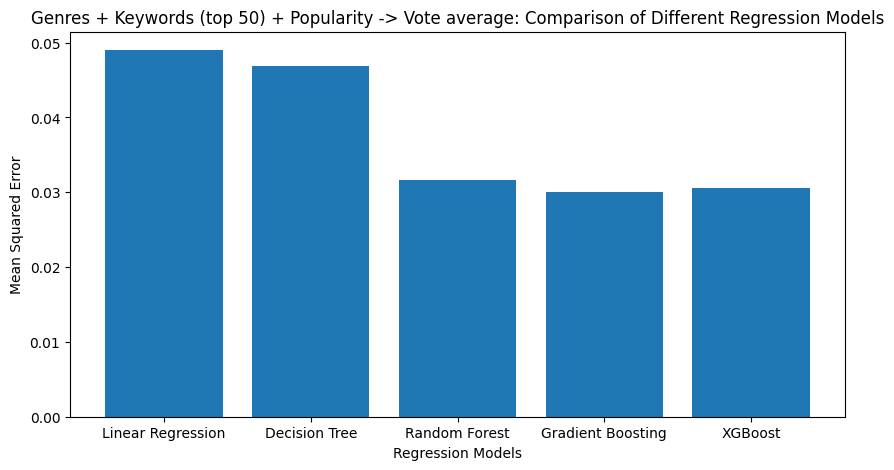

===> Summary | Genres + Keywords (top 50) + Vote count -> Vote average
                          Model      RMSE
3  Gradient Boosting Regression  0.098654
4                XGB Regression  0.100195
2      Random Forest Regression  0.106057
1      Decision Tree Regression  0.118069
0             Linear Regression  0.177525


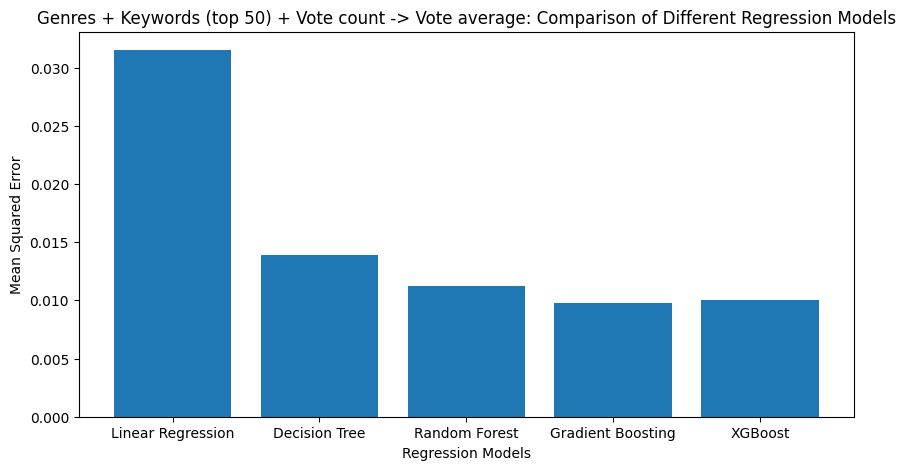

===> Summary | Genres + Keywords (top 50) -> Vote average
                          Model      RMSE
4                XGB Regression  0.210585
2      Random Forest Regression  0.211353
1      Decision Tree Regression  0.216606
3  Gradient Boosting Regression  0.220038
0             Linear Regression  0.221581


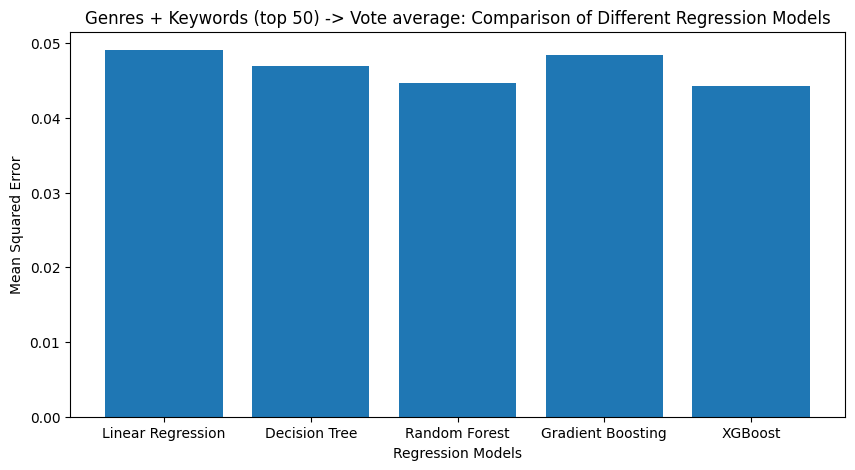

===> Summary | Genres + Keywords (top 50) -> Popularity
                          Model      RMSE
2      Random Forest Regression  1.104022
0             Linear Regression  1.120392
4                XGB Regression  1.136162
3  Gradient Boosting Regression  1.152189
1      Decision Tree Regression  1.169906


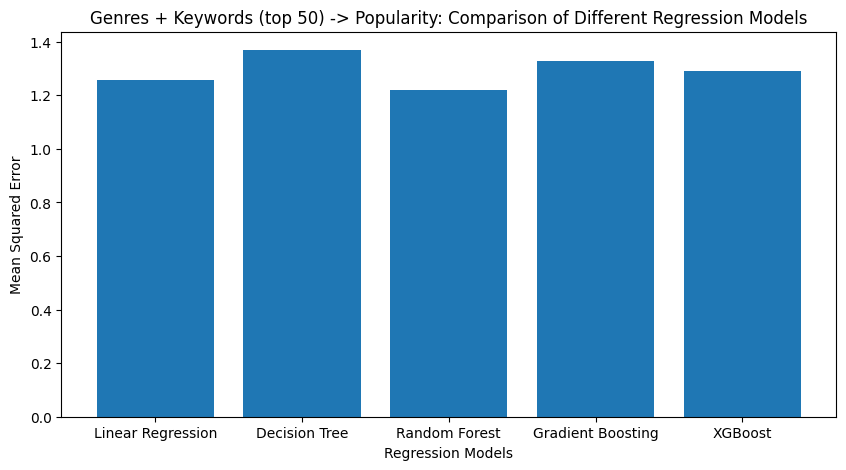

In [7]:
from tmdb15k.workflows import Relationship 

relationships: list[Relationship] = [
    Relationship('Vote average -> Popularity', [vote_average.df_min_max], popularity.df_z_score),
    Relationship('Vote count + Vote average -> Popularity', [vote_count.df_log10_z_score, vote_average.df_min_max], popularity.df_z_score),
    Relationship('Genres + Keywords (top 50) + Vote average + Vote count -> Popularity', [genres.df, keywords.df[keywords.columns_top_50], vote_average.df_min_max, vote_count.df_log10_z_score], popularity.df_z_score),
    Relationship('Genres + Keywords (top 50) + Popularity + Vote count -> Vote average', [genres.df, keywords.df[keywords.columns_top_50], popularity.df_z_score, vote_count.df_log10_z_score], vote_average.df_min_max),
    Relationship('Genres + Keywords (top 50) + Popularity -> Vote average', [genres.df, keywords.df[keywords.columns_top_50], popularity.df_z_score], vote_average.df_min_max),
    Relationship('Genres + Keywords (top 50) + Vote count -> Vote average', [genres.df, keywords.df[keywords.columns_top_50], vote_count.df_log10_z_score], vote_average.df_min_max),
    Relationship('Genres + Keywords (top 50) -> Vote average', [genres.df, keywords.df[keywords.columns_top_50]], vote_average.df_min_max),
    Relationship('Genres + Keywords (top 50) -> Popularity', [genres.df, keywords.df[keywords.columns_top_50]], popularity.df_z_score),
]

for i in relationships:
    i.print_summary()
    i.print_plot()

===> Summary | Vote average -> Popularity
                          Model      RMSE
3  Gradient Boosting Regression  1.120490
2      Random Forest Regression  1.120666
4                XGB Regression  1.120714
1      Decision Tree Regression  1.120718
0             Linear Regression  1.120793


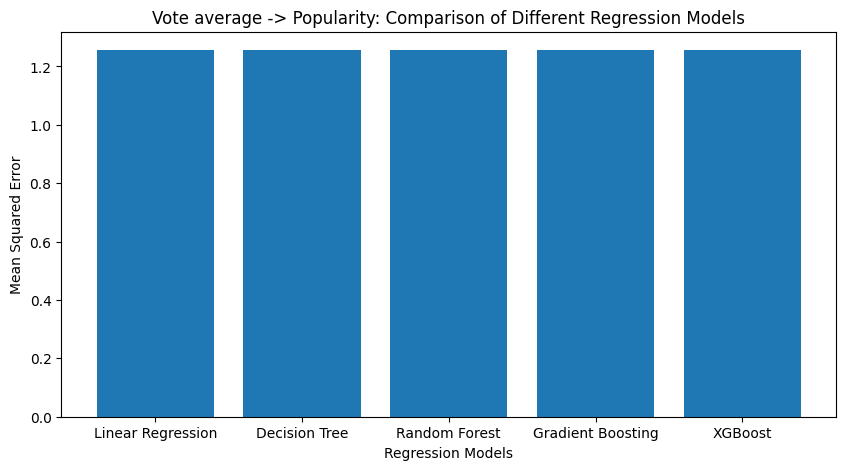

===> Summary | Vote count + Vote average -> Popularity
                          Model      RMSE
0             Linear Regression  1.115485
3  Gradient Boosting Regression  1.140315
2      Random Forest Regression  1.151524
4                XGB Regression  1.170730
1      Decision Tree Regression  1.172940


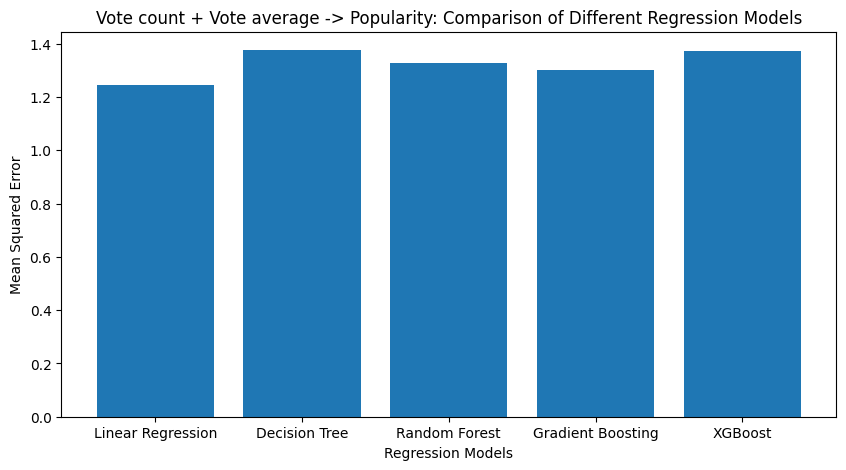

===> Summary | Genres + Keywords (top 100) + Vote average + Vote count -> Popularity
                          Model      RMSE
0             Linear Regression  1.118536
2      Random Forest Regression  1.174519
1      Decision Tree Regression  1.181686
4                XGB Regression  1.246310
3  Gradient Boosting Regression  1.292080


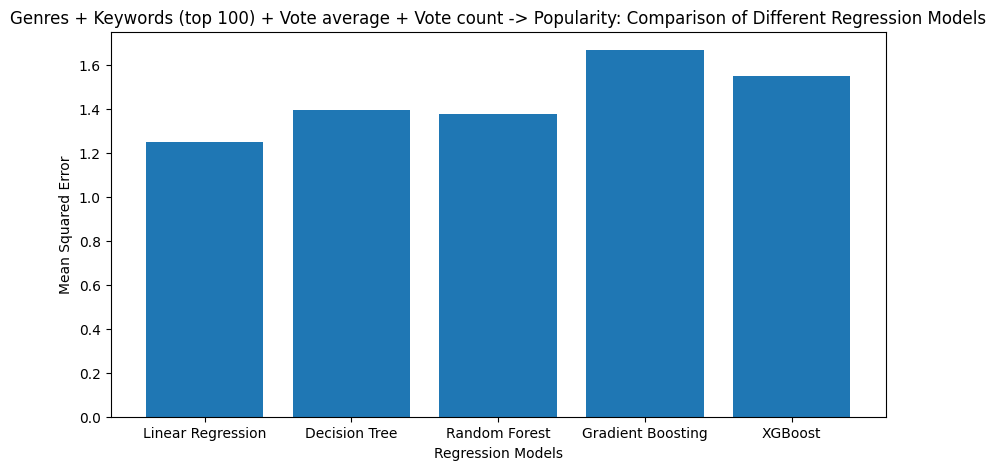

===> Summary | Genres + Keywords (top 100) + Popularity + Vote count -> Vote average
                          Model      RMSE
3  Gradient Boosting Regression  0.098397
4                XGB Regression  0.103245
2      Random Forest Regression  0.105936
1      Decision Tree Regression  0.130056
0             Linear Regression  0.177016


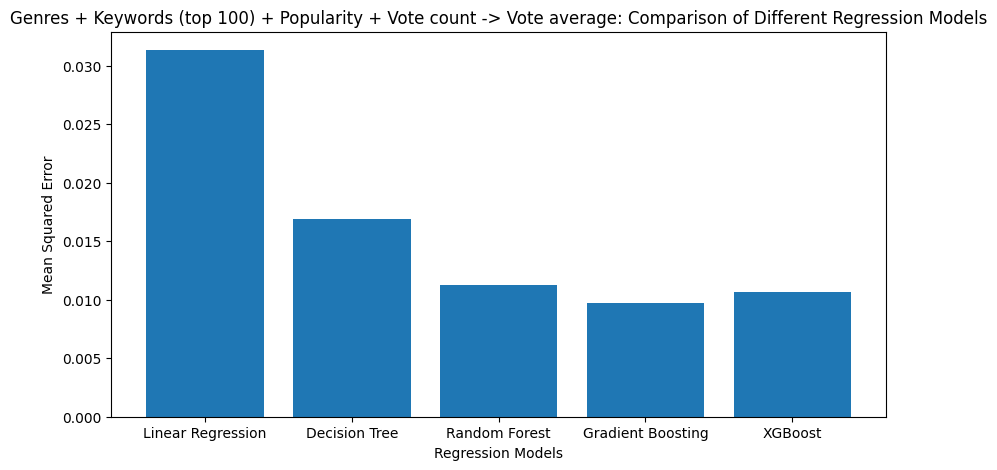

===> Summary | Genres + Keywords (top 100) + Popularity -> Vote average
                          Model      RMSE
3  Gradient Boosting Regression  0.173389
4                XGB Regression  0.174179
2      Random Forest Regression  0.177405
1      Decision Tree Regression  0.215196
0             Linear Regression  0.219162


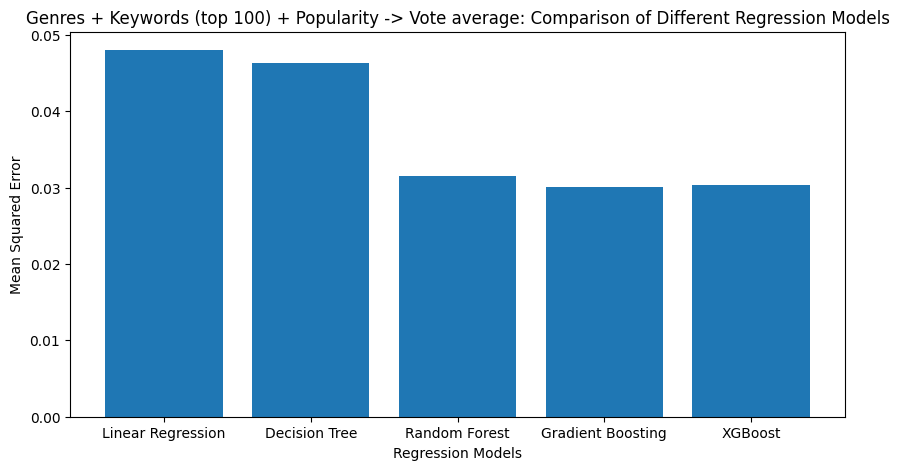

===> Summary | Genres + Keywords (top 100) + Vote count -> Vote average
                          Model      RMSE
3  Gradient Boosting Regression  0.098409
4                XGB Regression  0.098711
2      Random Forest Regression  0.105454
1      Decision Tree Regression  0.117136
0             Linear Regression  0.177015


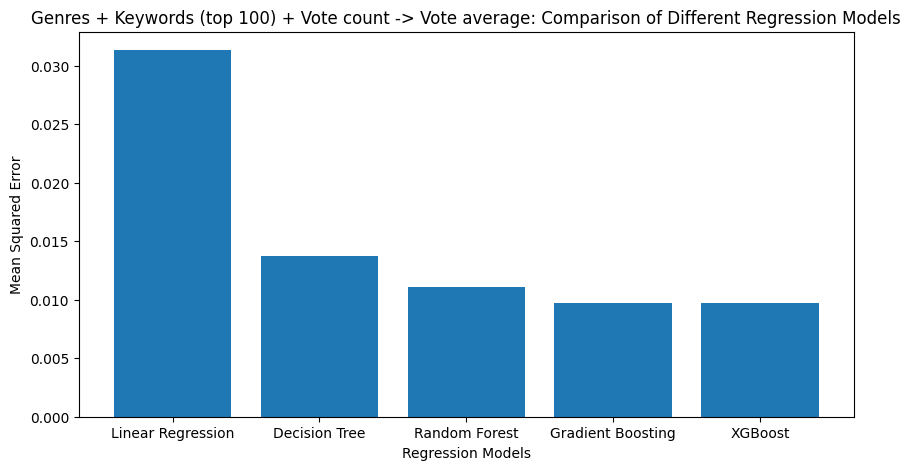

===> Summary | Genres + Keywords (top 100) -> Vote average
                          Model      RMSE
4                XGB Regression  0.208874
2      Random Forest Regression  0.210088
1      Decision Tree Regression  0.217270
0             Linear Regression  0.219389
3  Gradient Boosting Regression  0.220091


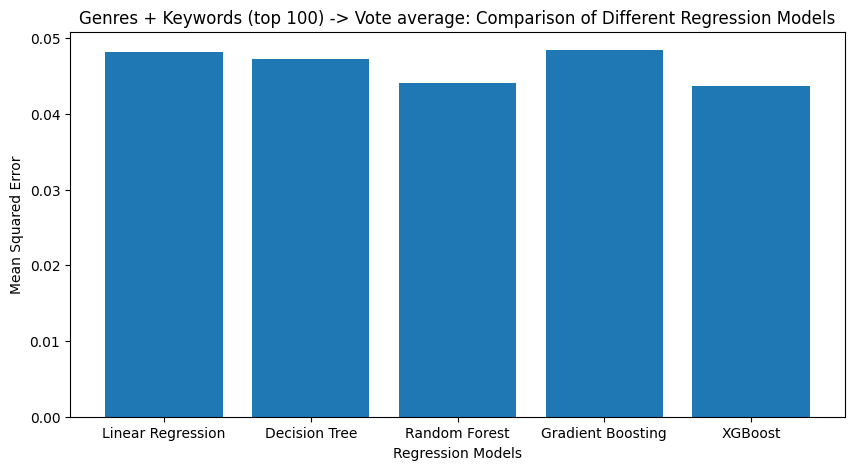

===> Summary | Genres + Keywords (top 100) -> Popularity
                          Model      RMSE
0             Linear Regression  1.121408
2      Random Forest Regression  1.160277
4                XGB Regression  1.277163
3  Gradient Boosting Regression  1.397126
1      Decision Tree Regression  1.917151


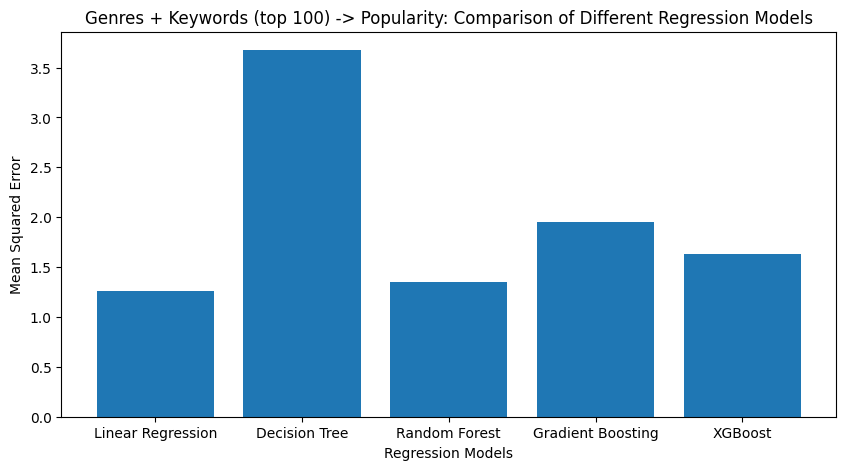

In [9]:
from tmdb15k.workflows import Relationship 

relationships: list[Relationship] = [
    Relationship('Vote average -> Popularity', [vote_average.df_min_max], popularity.df_z_score),
    Relationship('Vote count + Vote average -> Popularity', [vote_count.df_log10_z_score, vote_average.df_min_max], popularity.df_z_score),
    Relationship('Genres + Keywords (top 100) + Vote average + Vote count -> Popularity', [genres.df, keywords.df[keywords.columns_top_100], vote_average.df_min_max, vote_count.df_log10_z_score], popularity.df_z_score),
    Relationship('Genres + Keywords (top 100) + Popularity + Vote count -> Vote average', [genres.df, keywords.df[keywords.columns_top_100], popularity.df_z_score, vote_count.df_log10_z_score], vote_average.df_min_max),
    Relationship('Genres + Keywords (top 100) + Popularity -> Vote average', [genres.df, keywords.df[keywords.columns_top_100], popularity.df_z_score], vote_average.df_min_max),
    Relationship('Genres + Keywords (top 100) + Vote count -> Vote average', [genres.df, keywords.df[keywords.columns_top_100], vote_count.df_log10_z_score], vote_average.df_min_max),
    Relationship('Genres + Keywords (top 100) -> Vote average', [genres.df, keywords.df[keywords.columns_top_100]], vote_average.df_min_max),
    Relationship('Genres + Keywords (top 100) -> Popularity', [genres.df, keywords.df[keywords.columns_top_100]], popularity.df_z_score),
]

for i in relationships:
    i.print_summary()
    i.print_plot()